In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [36]:
data=pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')
data.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21558 entries, 0 to 21557
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               21558 non-null  object
 1   number_of_strikes  21558 non-null  int64 
 2   center_point_geom  21558 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.4+ KB


In [38]:
data.describe()

,number_of_strikes
count,21558.000000
mean,89.171769
std,107.216924
min,23.000000
25%,35.000000
50%,54.000000
75%,97.000000
max,1899.000000


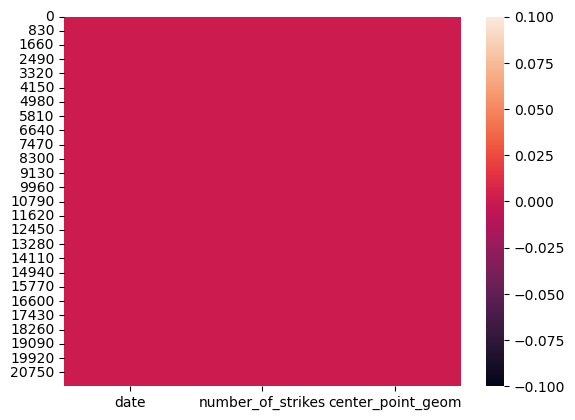

In [39]:
sns.heatmap(data.isna());

In [40]:
#now extracting the data 

data['date']=pd.to_datetime(data['date'])
data['Year']=data['date'].dt.year
data['Month']=data['date'].dt.month
data['Month_name']=data['date'].dt.month_name().str.slice(stop=3)
data['week']=data['date'].dt.isocalendar().week
data['Day']=data['date'].dt.day
data['Day_of_week']=data['date'].dt.day_of_week
data['Day_of_year']=data['date'].dt.day_of_year
# data.drop('date',axis=1,inplace=True)


In [41]:
data.tail()

,date,number_of_strikes,center_point_geom,Year,Month,Month_name,week,Day,Day_of_week,Day_of_year
21553,2018-02-23,58,POINT(-89.5 36.6),2018,2,Feb,8,23,4,54
21554,2018-02-23,53,POINT(-89.4 36.6),2018,2,Feb,8,23,4,54
21555,2018-02-23,23,POINT(-89.2 36.7),2018,2,Feb,8,23,4,54
21556,2018-02-23,23,POINT(-88.4 36.7),2018,2,Feb,8,23,4,54
21557,2018-02-23,47,POINT(-88.3 36.7),2018,2,Feb,8,23,4,54


In [74]:
# checking the total number of strikes in a specific day
data.groupby(['date']).sum().sort_values('number_of_strikes',ascending=False)['number_of_strikes'].head()

date
2018-02-23     21873
2018-02-22    161454
2018-02-21    269927
2018-02-20    277495
2018-02-19     68477
Name: number_of_strikes, dtype: int64

In [64]:
data.dtypes

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
Year                          int32
Month                         int32
Month_name                   object
week                         UInt32
Day                           int32
Day_of_week                   int32
Day_of_year                   int32
dtype: object

In [87]:
data.groupby(['Month_name'])['number_of_strikes'].sum()


Month_name
Feb    1320344
Jan     602021
Name: number_of_strikes, dtype: int64

In [83]:
df_by_month

,Month,Month_name,number_of_strikes
0,2,Feb,1320344
1,1,Jan,602021
